In [2]:
# ~ ignore this cell, this is same as in final.ipynb ~

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

comments_df = pd.read_csv("../data/100m_steamreviews_helpfulonly.csv")
games_df = pd.read_csv("../data/steamgames71k.csv")

games_cols_to_keep = ['AppID', 'Name', 'Genres', 'Average playtime forever', 'Estimated owners', 'Supported languages']
games_dff = games_df[games_cols_to_keep]
comments_cols_to_keep = ['appid', 'language', 'voted_up', 'votes_up', 'votes_funny', 'received_for_free', 'author_num_reviews',
                         'game', 'review']
comments_dff = comments_df[comments_cols_to_keep]
comments_dff = comments_dff.rename(columns={'appid':'AppID', 'language':'reviewlanguage'})
combined_df = pd.merge(games_dff, comments_dff, on='AppID', how='inner')

# ~ ignore this cell, this is same as in final.ipynb ~

C:\Users\amons\AppData\Local\Temp\ipykernel_97276\2566868572.py:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_df = pd.read_csv("../data/100m_steamreviews_helpfulonly.csv")


In [ ]:
# ~ ~ ~ need to copy stuff below to final.ipynb ~ ~ ~

In [3]:
from collections import Counter
from wordcloud import WordCloud
from string import punctuation

from nltk.corpus import stopwords as nltk_stopwords
stopwords = set(nltk_stopwords.words("english"))

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

import spacy
from spacy import displacy
spacynlp = spacy.load("en_core_web_sm")

In [4]:
# wordcloud helper functions

stopwords.update(["game", "games", "game,", "like", "get", "one", "time"])
stopwords.update(["i", "it", "we", "a couple", "weeks"])

def makewordcloud(wordcounter:Counter, title):
    wordcloud = WordCloud(width=1200, height=600).generate_from_frequencies(frequencies=dict(wordcounter))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()
    
def getwordcounts(reviewseries, stem=False):
    wordcounter = Counter()
    for reviewtext in reviewseries:
        txt = reviewtext.strip().lower()
        txt = ''.join(filter(lambda x: x.isalpha() or x.isdigit() or x.isspace(), txt))
        words = txt.split()
        words = [w for w in words if w not in stopwords]
        if stem:
            words = [stemmer.stem(w) for w in words]
        wordcounter.update(words)
    return wordcounter

generating wordcloud english no stem..


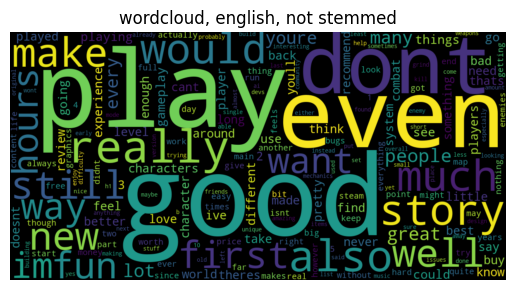

generating wordcloud english stem..


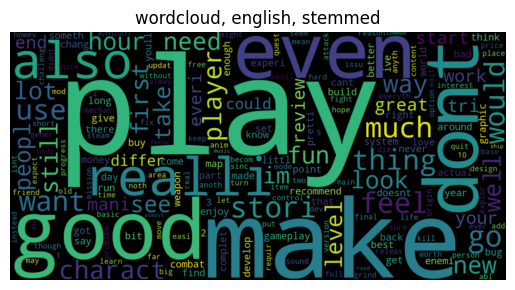

In [6]:
# wordcloud (english) (all genres)
# this takes like ~7 minutes to run

df = combined_df[["reviewlanguage", "review"]]
df = df.loc[df["reviewlanguage"] == "english"]

print("generating wordcloud english no stem..")
wordcounter = getwordcounts(df['review'], stem=False)
makewordcloud(wordcounter, "wordcloud, english, not stemmed")

print("generating wordcloud english stem..")
wordcounter = getwordcounts(df['review'], stem=True)
makewordcloud(wordcounter, "wordcloud, english, stemmed")

In [ ]:
# wordcloud (english) (for each genre)
pass

In [ ]:
# noun phrase extraction (english) (all genres)
# this took like ~1.5 hours to run  T-T

nounchunk_counter = Counter()

df = combined_df[["reviewlanguage", "review"]]
df = df.loc[df["reviewlanguage"] == "english"]

for reviewtext in df["review"]:
    txt = reviewtext.strip().lower()
    
    doc = spacynlp(txt)
    for n in doc.noun_chunks:
        if n.text not in stopwords:
            nounchunk_counter[n.text] += 1

nounchunk_counter.most_common()
# write to file
with open("./nounphraseext_1.txt", "w") as f:
    f.write(str(nounchunk_counter.most_common()))

In [ ]:
# noun phrase extraction (english) (for each genre)
pass